# Predictive Bank Marketing: A Random Forest Classifier for Term Deposit
 Subscription

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv("/content/drive/MyDrive/ML_Pratice/bank-additional-full.csv", sep=";")

In [3]:
# Afficher les premières lignes du dataframe
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Afficher les dernieres lignes du dataframe
df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
# Afficher les informations sur le dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Afficher les statistiques descriptives des colonnes numeriques
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# Verification des valeurs manquantes
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


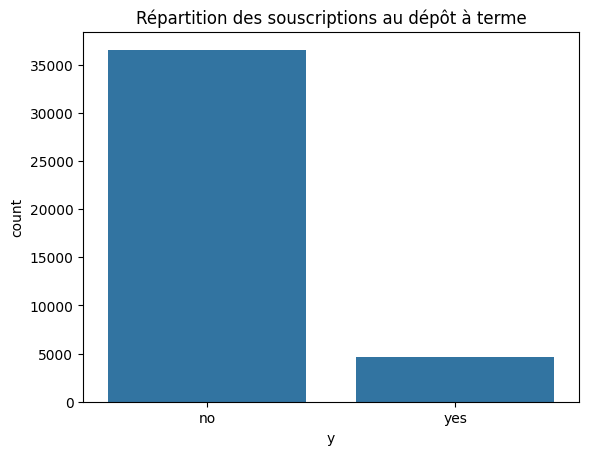

In [8]:
# Distribution de la variable cible
sns.countplot(x="y", data=df)
plt.title("Répartition des souscriptions au dépôt à terme")
plt.show()

In [9]:
# Calcul du pourcentage de chaque Classe
df["y"].value_counts(normalize=True) * 100


,proportion
y,
no,88.734583
yes,11.265417


#Analyse des Variables numeriques

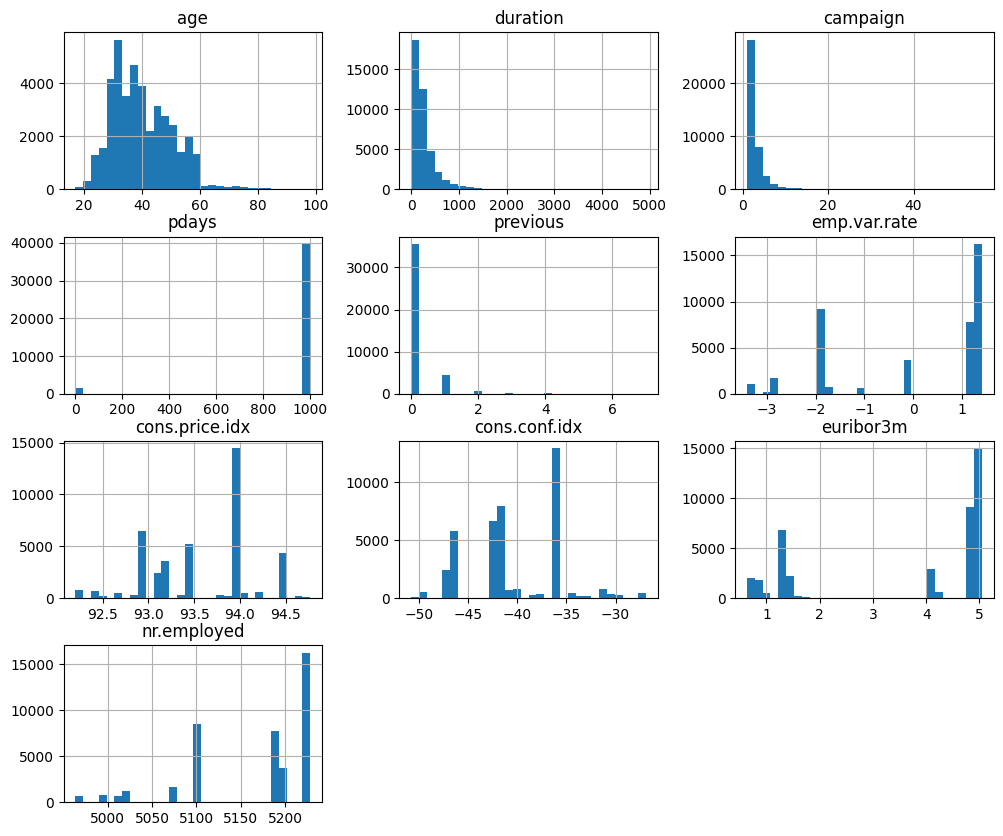

In [10]:
# Histogramme des Var num
df.hist(figsize=(12, 10), bins=30)
plt.show()

#Visualisation des Outliers

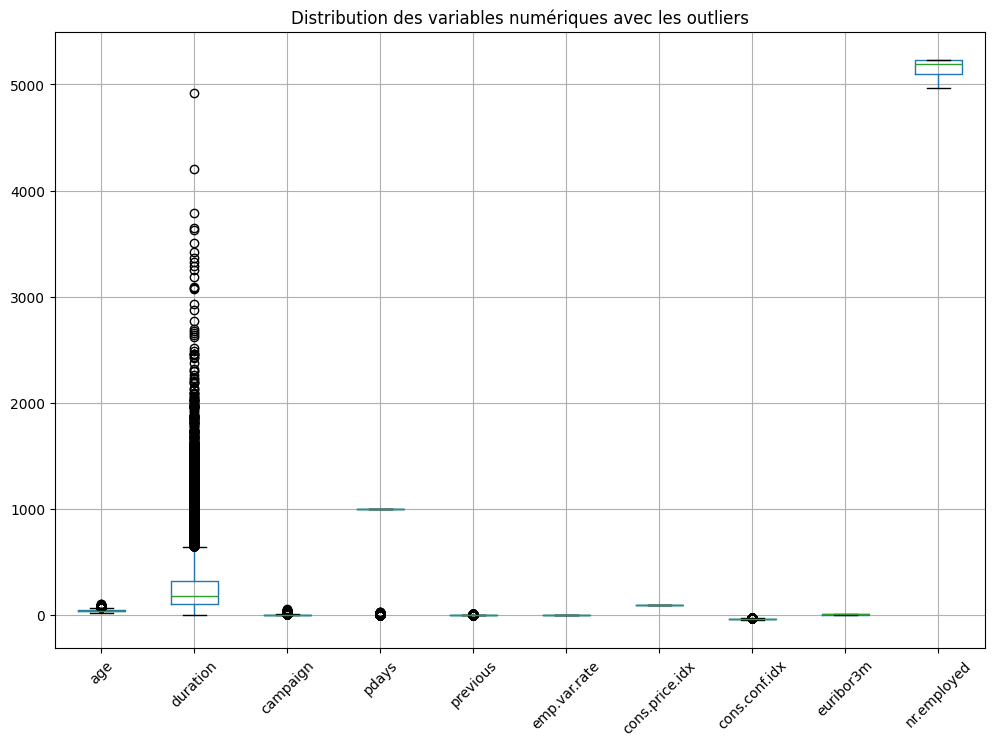

In [11]:

# Variables numériques
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Afficher les boxplots
plt.figure(figsize=(12, 8))
df[num_cols].boxplot(rot=45)
plt.title("Distribution des variables numériques avec les outliers")
plt.show()


In [12]:
# Détection des outliers avec IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Seuils pour détecter les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Affichage des valeurs extrêmes
outliers = (df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)
print(outliers.sum())  # Nombre d'outliers par colonne


age                469
duration          2963
campaign          2406
pdays             1515
previous          5625
emp.var.rate         0
cons.price.idx       0
cons.conf.idx      447
euribor3m            0
nr.employed          0
dtype: int64


In [13]:
# Liste des variables à traiter
outlier_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']

# Calcul des seuils IQR
Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

# Seuils pour détecter les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


#Supprimer les Lignes avec des Outliers

In [14]:
# Suppression des lignes contenant des outliers
df_cleaned = df[~((df[outlier_cols] < lower_bound) | (df[outlier_cols] > upper_bound)).any(axis=1)]

# Vérification de la taille du dataset après nettoyage
print(f"Taille avant nettoyage : {df.shape[0]} lignes")
print(f"Taille après nettoyage : {df_cleaned.shape[0]} lignes")


Taille avant nettoyage : 41188 lignes
Taille après nettoyage : 30573 lignes


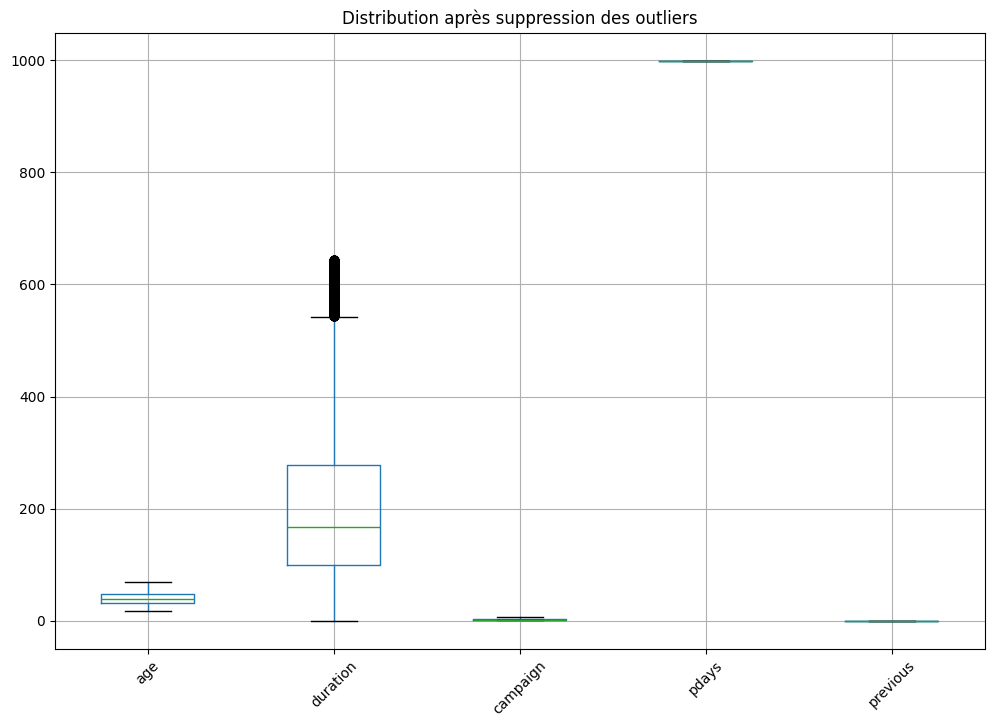

In [15]:

plt.figure(figsize=(12, 8))
df_cleaned[outlier_cols].boxplot(rot=45)
plt.title("Distribution après suppression des outliers")
plt.show()


In [16]:
print(df_cleaned.isnull().sum())


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


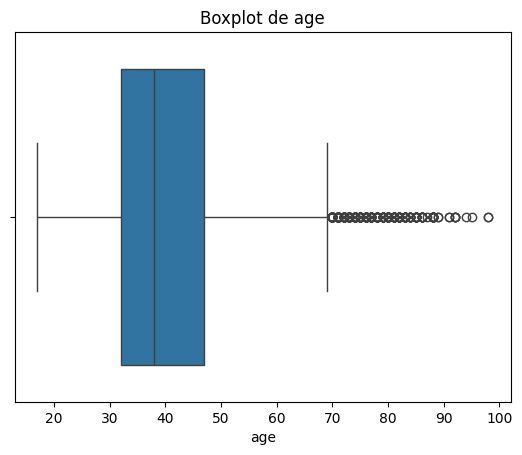

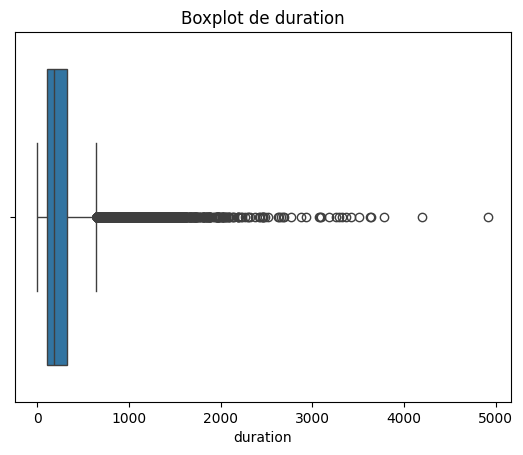

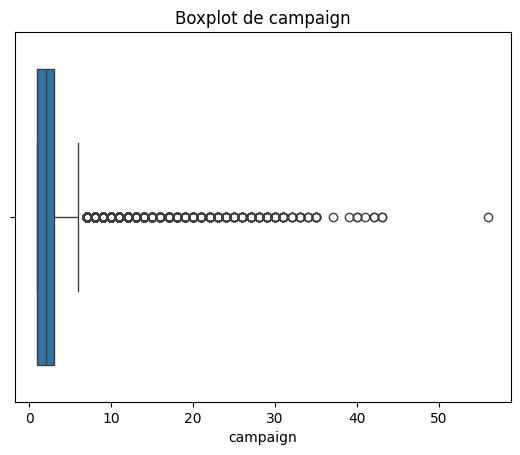

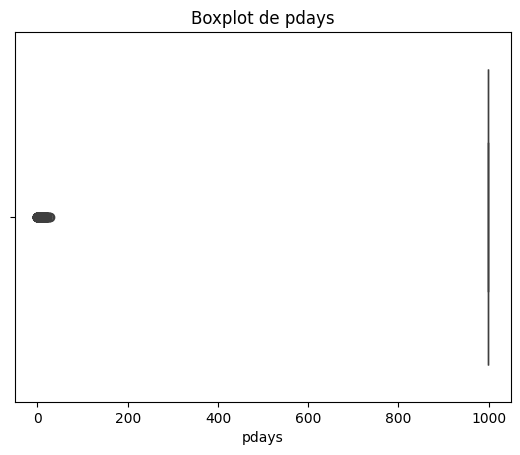

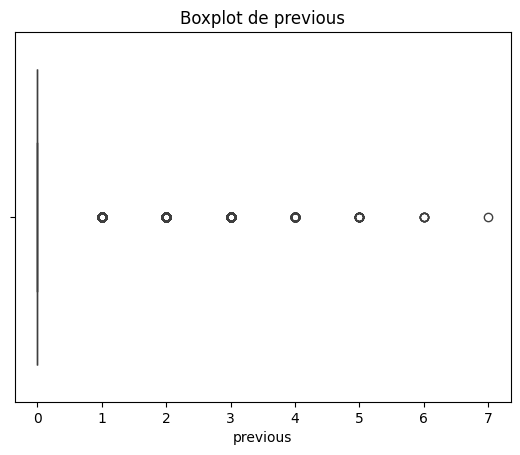

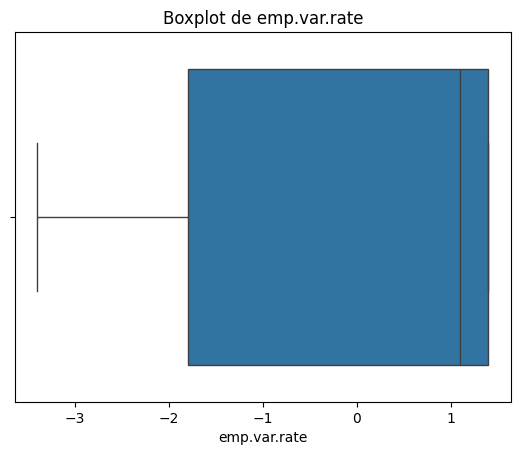

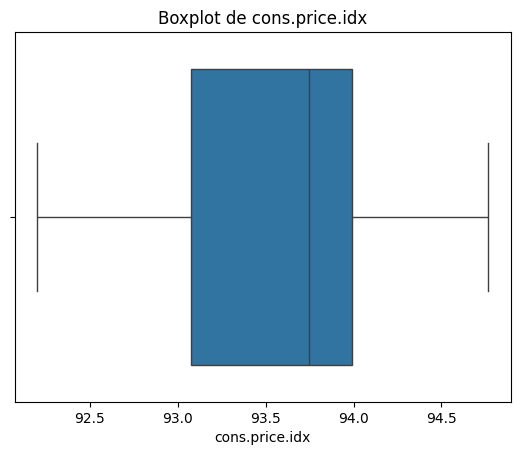

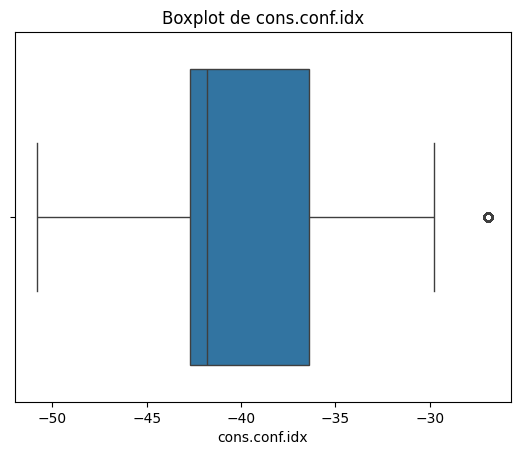

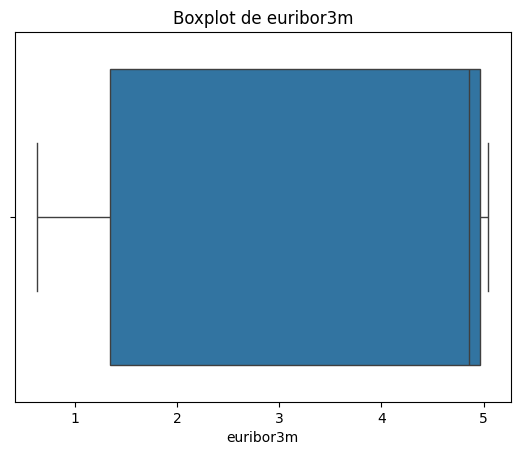

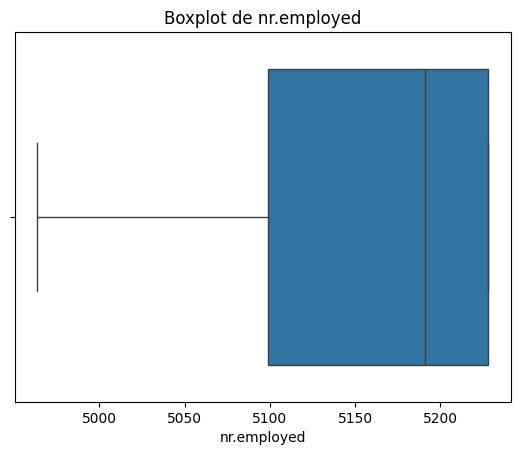

In [17]:
# Boxplot pour les colonne numerique
for col in df.select_dtypes(include=['number']).columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

#Analyse des Variables Qualitative

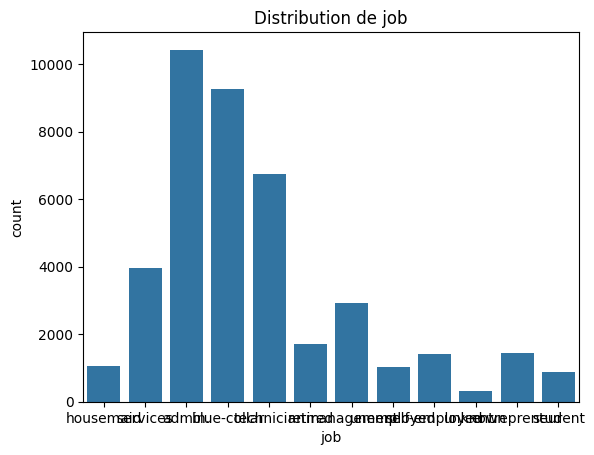

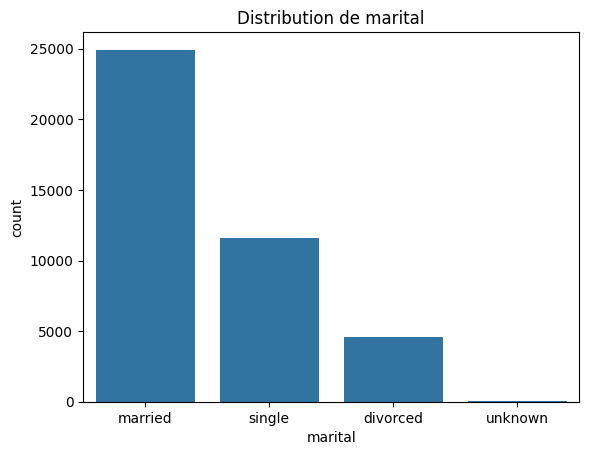

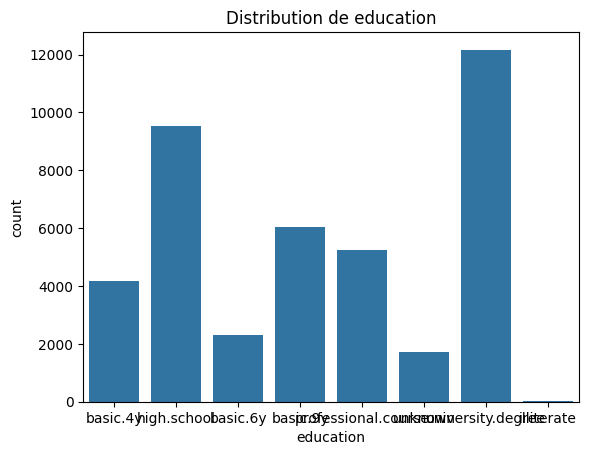

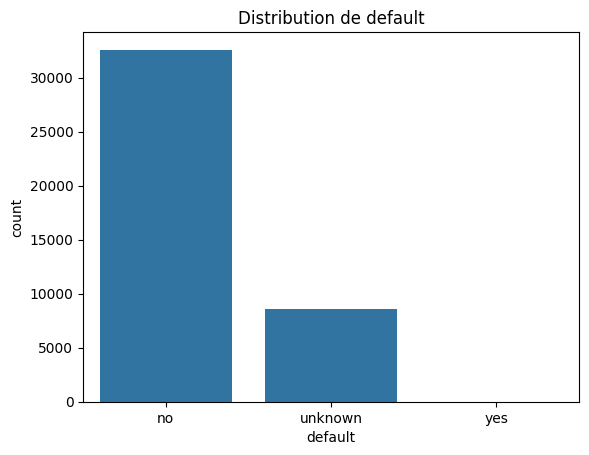

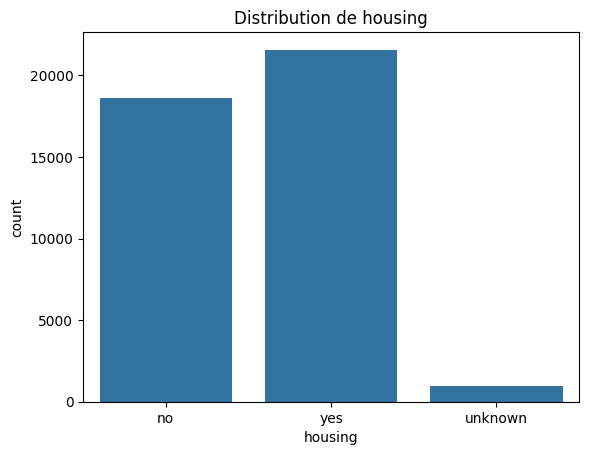

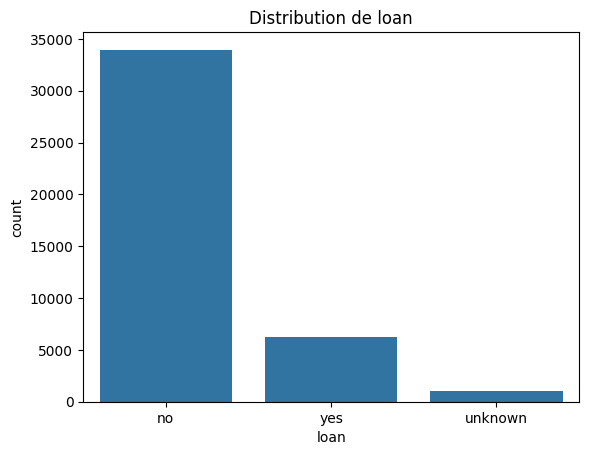

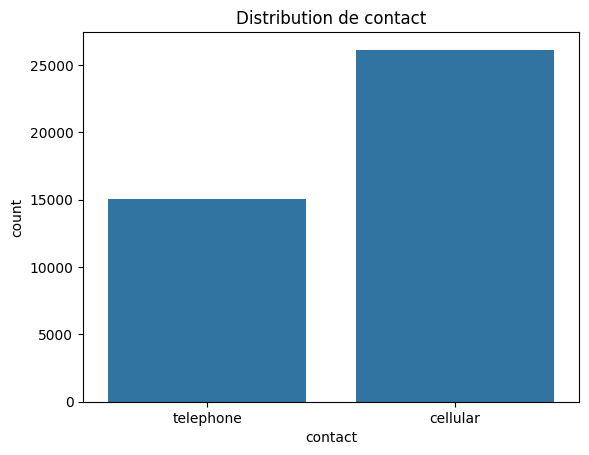

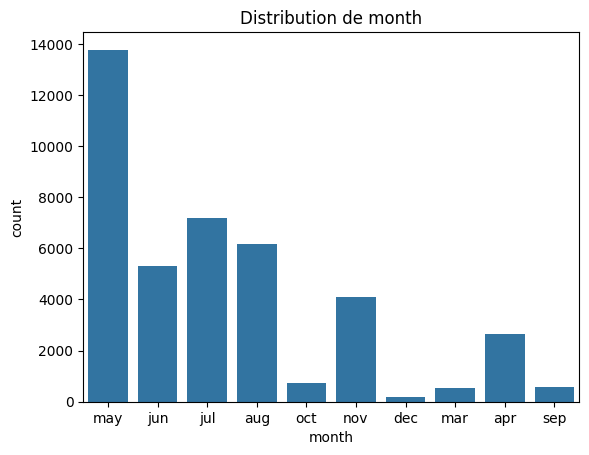

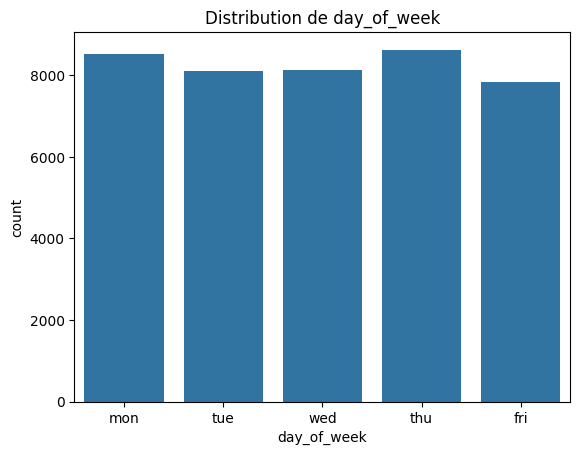

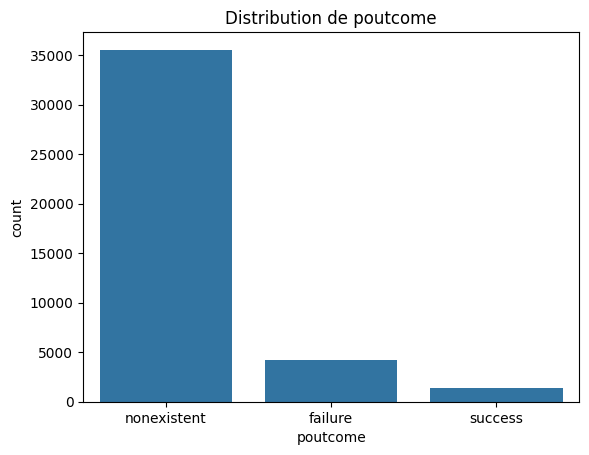

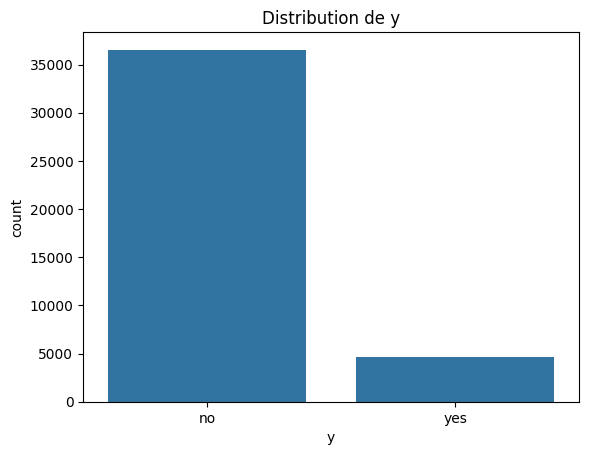

In [18]:
# Affichage des variables qualitative et de leur frequence
for col in df.select_dtypes(include=['object']).columns:
    plt.figure()
    sns.countplot(x=df[col])
    plt.title(f'Distribution de {col}')
    plt.show()

# Corrélations Entre les Variables

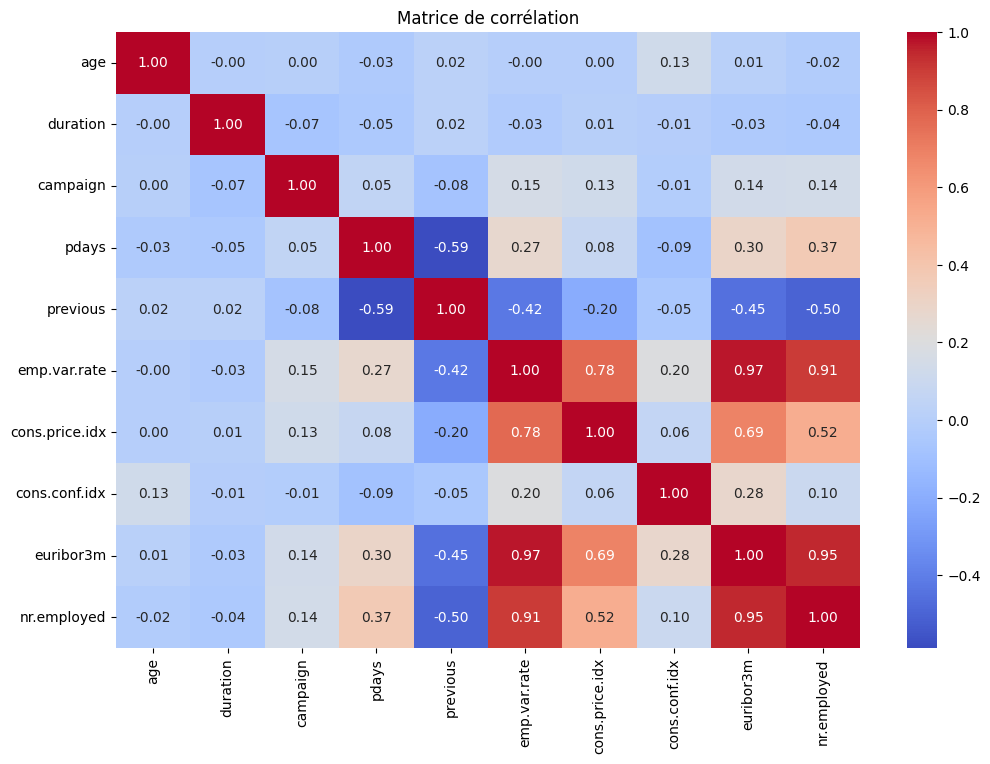

In [19]:
# Matrice de Correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

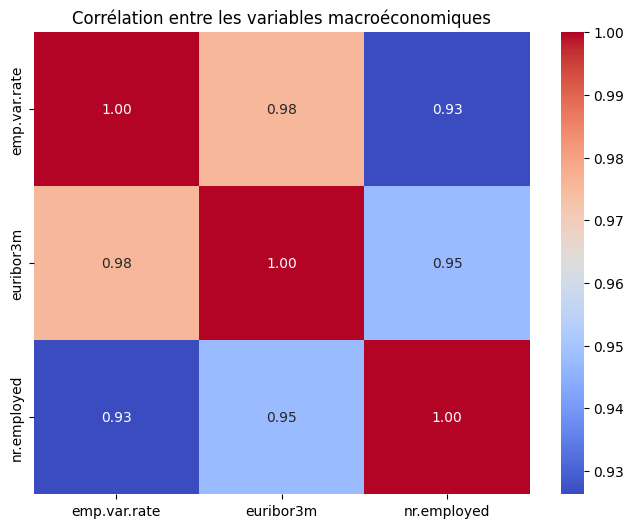

In [20]:
#Calcul de la matrice de corrélation
corr_matrix = df_cleaned[['emp.var.rate', 'euribor3m', 'nr.employed']].corr()

# Affichage avec heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre les variables macroéconomiques")
plt.show()

## suppression des variables redondantes

In [22]:
"""df_cleaned = df_cleaned.drop(columns=['nr.employed'])
df_cleaned = df_cleaned.drop(columns=['emp.var.rate'])"""

#Traitement des Variables Catégorielles

## Encodage des Variables Binaire

In [23]:
binary_cols = ['default', 'housing', 'loan']
df_cleaned[binary_cols] = df_cleaned[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))


## Encodage des Variables Multicalsse

In [24]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['job', 'marital', 'education', 'contact'], drop_first=True)


## Encodage des Variables Odinales

In [25]:
# Encodage du mois (ordre chronologique)
month_order = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
               'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df_cleaned['month'] = df_cleaned['month'].map(month_order)

# Encodage des jours (ordre de la semaine)
day_order = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
df_cleaned['day_of_week'] = df_cleaned['day_of_week'].map(day_order)


#Standardisation des Variables Numériques

In [26]:

# Liste des colonnes numériques continues
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous',
            'euribor3m', 'cons.price.idx', 'cons.conf.idx']

# Initialisation du scaler
scaler = StandardScaler()

# Transformation des colonnes sélectionnées
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

# Vérification : Moyenne ≈ 0, Écart-type ≈ 1
df_cleaned[num_cols].describe()


,age,duration,campaign,pdays,previous,euribor3m,cons.price.idx,cons.conf.idx
count,3.057300e+04,3.057300e+04,3.057300e+04,30573.0,30573.0,3.057300e+04,3.057300e+04,3.057300e+04
mean,-2.826088e-16,3.718537e-17,4.834098e-17,0.0,0.0,-4.164762e-16,1.047140e-14,5.800918e-16
std,1.000016e+00,1.000016e+00,1.000016e+00,0.0,0.0,1.000016e+00,1.000016e+00,1.000016e+00
min,-2.279180e+00,-1.462619e+00,-8.285488e-01,0.0,0.0,-2.105204e+00,-2.631012e+00,-2.438248e+00
25%,-8.074078e-01,-7.491136e-01,-8.285488e-01,0.0,0.0,4.657137e-02,-8.019236e-01,-5.544442e-01
50%,-1.766483e-01,-2.710654e-01,-5.984117e-02,0.0,0.0,5.789563e-01,5.126767e-01,-3.451327e-01
75%,7.694910e-01,5.137900e-01,7.088664e-01,0.0,0.0,6.443926e-01,6.518265e-01,9.107363e-01
max,3.082276e+00,3.132353e+00,3.014989e+00,0.0,0.0,6.971229e-01,2.067127e+00,3.120136e+00


#Séparation des Données (Train/Test)

##Définir les Variables X (features) et y (cible)

In [27]:
# Définir la variable cible (y)
y = df_cleaned['y'].map({'yes': 1, 'no': 0})  # Encodage binaire

# Définir les variables explicatives (X)
X = df_cleaned.drop(columns=['y'])  # On enlève la cible des features


##Séparer en Train (80%) et Test (20%)

In [28]:

# Séparation des données en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vérification des dimensions
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((24458, 36), (6115, 36), (24458,), (6115,))

In [29]:
cat_cols = X_train.select_dtypes(include=['object']).columns
print("Colonnes catégorielles :", cat_cols)


Colonnes catégorielles : Index(['poutcome'], dtype='object')


In [30]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [31]:
print("Valeurs manquantes après encodage :")
print(X_train.isnull().sum().sum(), "valeurs manquantes")


Valeurs manquantes après encodage :
6688 valeurs manquantes


In [32]:
missing_values = X_train.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filtrer uniquement les colonnes avec des NaN
print("Colonnes avec des valeurs manquantes et leur nombre :\n", missing_values)


Colonnes avec des valeurs manquantes et leur nombre :
 default    5510
housing     589
loan        589
dtype: int64


In [33]:
for col in ['default', 'housing', 'loan']:
    X_train[col].fillna(X_train[col].mode()[0], inplace=True)
    X_test[col].fillna(X_test[col].mode()[0], inplace=True)


<ipython-input-33-2807ff53f7b7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(X_train[col].mode()[0], inplace=True)
<ipython-input-33-2807ff53f7b7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [34]:
print("Valeurs manquantes après correction :", X_train.isnull().sum().sum())


Valeurs manquantes après correction : 0


In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Nouvelle distribution des classes après SMOTE :")
print(y_train_resampled.value_counts())


Nouvelle distribution des classes après SMOTE :
y
1    23078
0    23078
Name: count, dtype: int64


##Gestion du Déséquilibre des Classes

Nous avons remarqué que 88.7% des clients n’ont pas souscrit au dépôt et seulement 11.3% l’ont fait.
Si on entraîne le modèle directement, il risque de toujours prédire "no" !

Nous allons utiliser SMOTE (Synthetic Minority Over-sampling Technique) car il est efficace pour équilibrer les classes sans perdre d’information.

In [35]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Nouvelle distribution des classes après SMOTE :")
print(y_train_resampled.value_counts())


Nouvelle distribution des classes après SMOTE :
y
1    23078
0    23078
Name: count, dtype: int64


#Entraînement du Modèle Random Forest

Maintenant que les données sont prêtes, nous allons :

Initialiser le modèle Random Forest

L'entraîner sur les données resamplées

Évaluer ses performances sur l'ensemble de test

##Entraînement du Random Forest

In [36]:

# Initialisation du modèle avec des hyperparamètres de base
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

# Entraînement sur les données resamplées
rf_model.fit(X_train_resampled, y_train_resampled)

# Prédiction sur l'ensemble de test
y_pred = rf_model.predict(X_test)


#Evaluation du Modele

In [37]:
from sklearn.metrics import classification_report, accuracy_score

# Évaluation du modèle
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))


Accuracy : 0.9044971381847915

Rapport de classification :
               precision    recall  f1-score   support

           0       0.98      0.91      0.95      5770
           1       0.34      0.76      0.47       345

    accuracy                           0.90      6115
   macro avg       0.66      0.84      0.71      6115
weighted avg       0.95      0.90      0.92      6115



Accuracy : 0.9044971381847915

Rapport de classification :
               precision    recall  f1-score   support

           0       0.98      0.91      0.95      5770
           1       0.34      0.76      0.47       345

    accuracy                           0.90      6115
   macro avg       0.66      0.84      0.71      6115
weighted avg       0.95      0.90      0.92      6115

##Optimiser les Hyperparamètres de Random Forest

In [38]:
rf_model = RandomForestClassifier(
    n_estimators=200,    # Plus d'arbres pour mieux apprendre
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,   # Réduit l'overfitting
    class_weight="balanced",
    random_state=42
)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred = rf_model.predict(X_test)

# Évaluation mise à jour
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))


Accuracy : 0.9223221586263287

Rapport de classification :
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      5770
           1       0.39      0.69      0.50       345

    accuracy                           0.92      6115
   macro avg       0.69      0.81      0.73      6115
weighted avg       0.95      0.92      0.93      6115



##Modèle : XGBoost

In [39]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(scale_pos_weight=5, random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_xgb))


Accuracy : 0.9188879803761243

Rapport de classification :
               precision    recall  f1-score   support

           0       0.98      0.93      0.96      5770
           1       0.38      0.73      0.50       345

    accuracy                           0.92      6115
   macro avg       0.68      0.83      0.73      6115
weighted avg       0.95      0.92      0.93      6115



# Importance des Variables
analyse des variables les plus importantes pour la prédiction.
### Affichage des variables plus importantes avec RANDOM FOREST

<ipython-input-40-5137fe1595f5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features.Importance[:10], y=features.Feature[:10], palette="viridis")


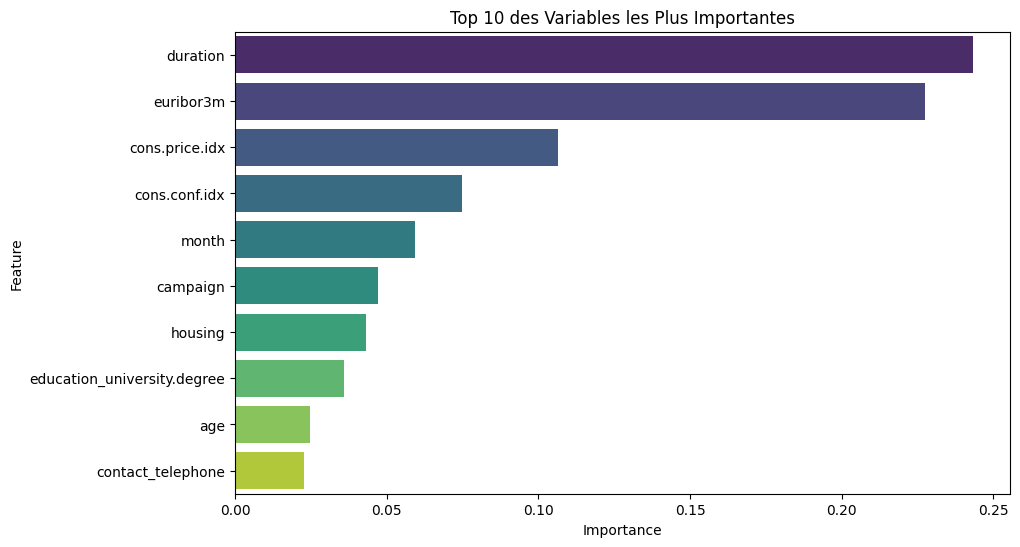

In [40]:

# Extraire l'importance des features
feature_importance = rf_model.feature_importances_

# Créer un DataFrame pour les visualiser
features = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': feature_importance
})

# Trier par importance décroissante
features = features.sort_values(by="Importance", ascending=False)

# Afficher le top 10 des features les plus importantes
plt.figure(figsize=(10, 6))
sns.barplot(x=features.Importance[:10], y=features.Feature[:10], palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 des Variables les Plus Importantes")
plt.show()


##Vers une Meilleure Modélisation?

In [41]:
# 1️⃣ Suppression de "duration"
X_train_reduced = X_train.drop(columns=['duration'])
X_test_reduced = X_test.drop(columns=['duration'])

# 2️⃣ Réapplication de SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reduced, y_train)

# 3️⃣ Réentraînement des modèles
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test_reduced)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test_reduced)

# 4️⃣ Évaluation des modèles
print("🔹 Random Forest sans 'duration'")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\n🔹 XGBoost sans 'duration'")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:04:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 Random Forest sans 'duration'
Accuracy: 0.9283728536385937
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5770
           1       0.36      0.35      0.36       345

    accuracy                           0.93      6115
   macro avg       0.66      0.66      0.66      6115
weighted avg       0.93      0.93      0.93      6115


🔹 XGBoost sans 'duration'
Accuracy: 0.9298446443172527
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5770
           1       0.36      0.31      0.33       345

    accuracy                           0.93      6115
   macro avg       0.66      0.64      0.65      6115
weighted avg       0.93      0.93      0.93      6115

